In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

In [ ]:
train_data = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/insaid2018/pca-file/master/train.csv")
train_data.shape

(4459, 4993)

In [ ]:
train_data.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [ ]:
train_data.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


## Data Pre-Processing

In [ ]:
total_missing_values = train_data.isnull().sum().sum()
print("Total missing values in the dataset: ", total_missing_values)

Total missing values in the dataset:  0


In [ ]:
train_data = train_data.drop("ID", axis=1)
train_data

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,1065000.0,0.0,0,0.0,0,0,0,0,0,70000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4455,48000.0,0.0,0,0.0,0,0,0,0,0,375000.0,...,0.0,0.0,80000.0,0,0,0,0,0,0,0
4456,2800000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4457,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [ ]:
drop_cols = []
for cols in train_data.columns:
    if train_data[cols].std() == 0:
        drop_cols.append(cols)
print(f"length of drop_cols ::: {len(drop_cols)}")
print(drop_cols)
train_data.drop(drop_cols, axis=1, inplace=True)
train_data.head()

length of drop_cols ::: 256
['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '992e6d1d3', '90a74210

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


# Exploratory Data Analysis

### What is the distribution of Target Variable??

<Figure size 1500x700 with 0 Axes>

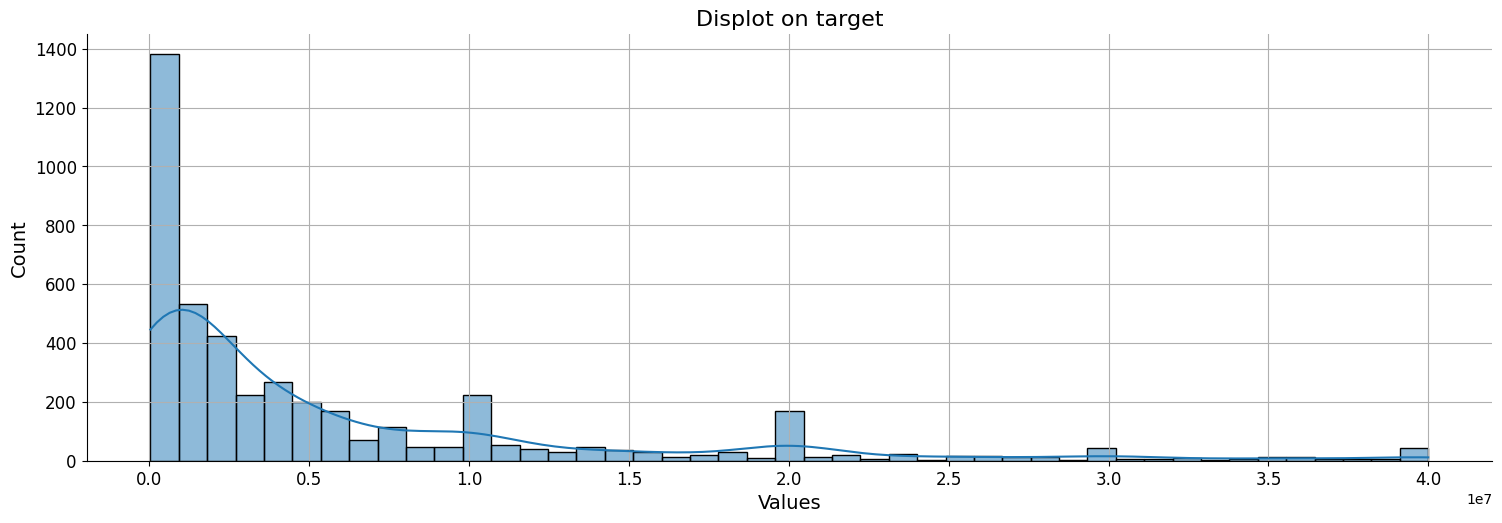

In [ ]:
paper = plt.figure(figsize=[15,7])
sns.displot(train_data["target"],kde=True,aspect=3)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Values', size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label='Displot on target', size=16)
plt.grid(visible=True)
plt.show()

<Figure size 1500x700 with 0 Axes>

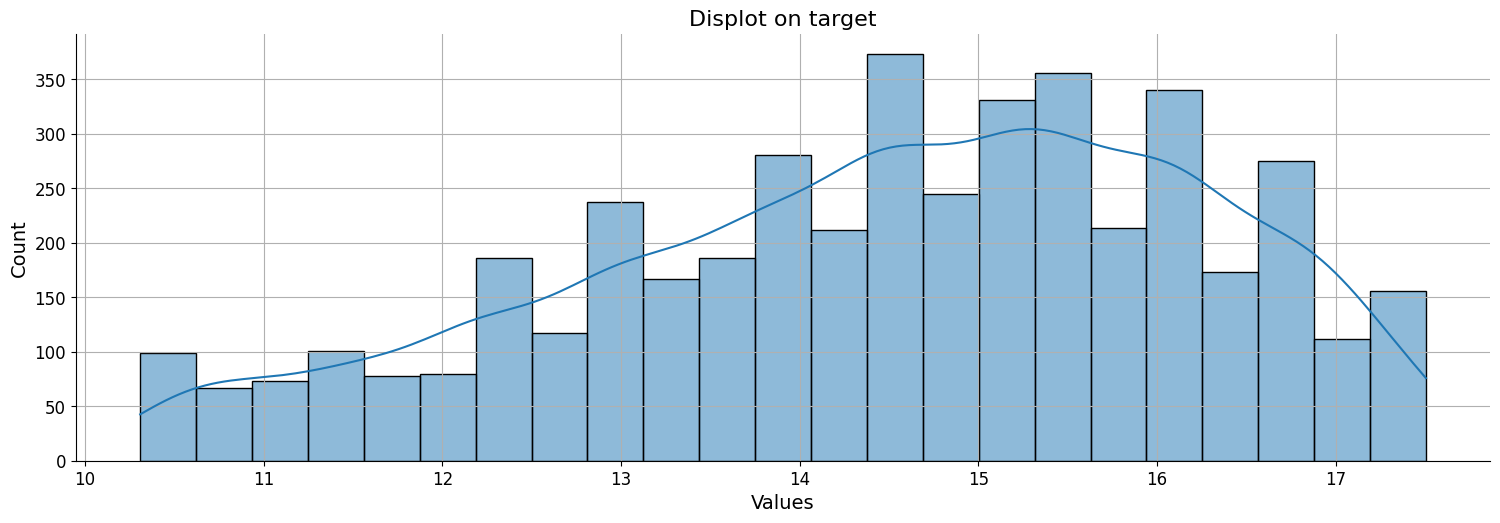

In [ ]:
paper = plt.figure(figsize=[15,7])
sns.displot(np.log1p(train_data["target"]),kde=True,aspect=3)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Values', size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label='Displot on target', size=16)
plt.grid(visible=True)
plt.show()

In [ ]:
np.log1p(train_data['target']).describe()

,target
count,4459.000000
mean,14.490239
std,1.750947
min,10.308986
25%,13.304687
50%,14.630876
75%,15.894952
max,17.504390


 ## What is the spread of the target feature with respect to a random column lets say 48df886f9?

In [ ]:
log_target = np.log(train_data['target'])

In [ ]:
log_48df886f9 = np.log(train_data['48df886f9'])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


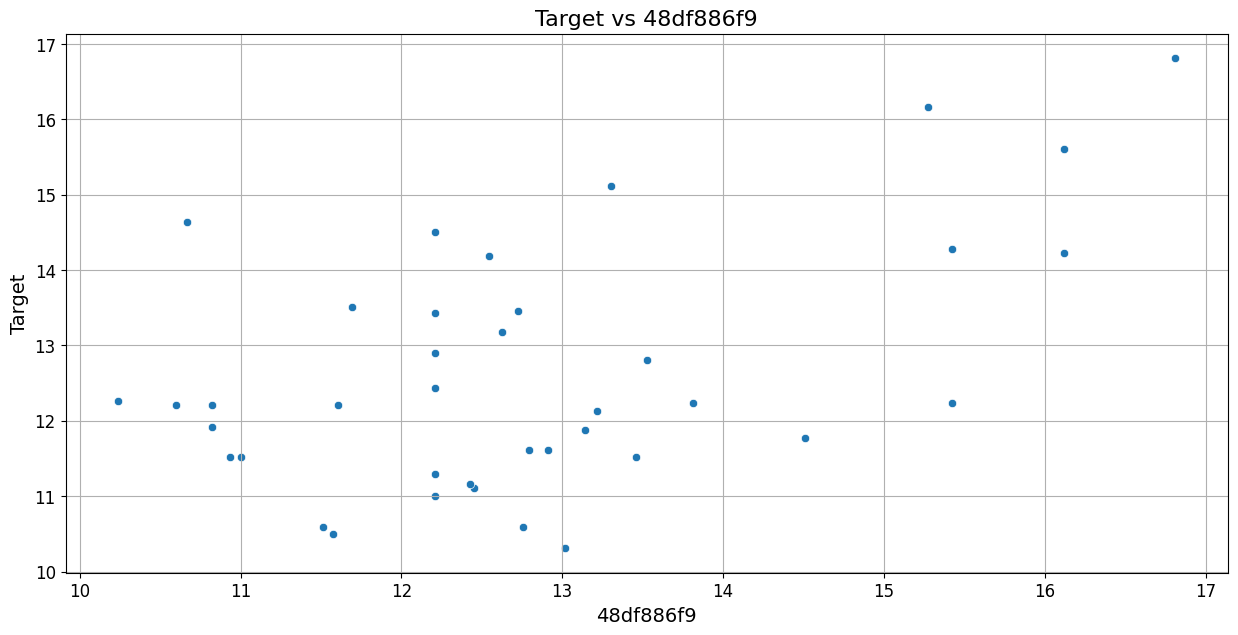

In [ ]:
paper = plt.figure(figsize=[15,7])
sns.scatterplot(data=train_data, x= log_48df886f9, y= log_target)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='48df886f9', size=14)
plt.ylabel(ylabel='Target', size=14)
plt.title(label='Target vs 48df886f9', size=16)
plt.grid(visible=True)
plt.show()

In [ ]:
scaler = StandardScaler()
scaler.fit(train_data)
scaled_data = scaler.transform(train_data)
scaled_df = pd.DataFrame(scaled_data,columns=train_data.columns)
scaled_df.head()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,3.893303,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,...,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852
1,-0.649177,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.038443,...,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852
2,0.492516,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,...,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852
3,-0.479137,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.267393,...,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852
4,1.026926,-0.037646,-0.021639,-0.04689,-0.019205,-0.017437,-0.053221,-0.022451,-0.024846,-0.059257,...,-0.114959,-0.100403,-0.178522,-0.114247,-0.014977,-0.025715,-0.022134,-0.072342,-0.056363,-0.125852


In [ ]:
x = scaled_df.drop("target", axis=1)
y = scaled_df["target"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (3567, 4735)
y_train shape:  (3567,)
x_test shape:  (892, 4735)
y_test shape:  (892,)


## Model Evaluation with PCA


In [ ]:
pca = PCA(n_components=0.8,random_state=0).fit(x_train)
var = np.cumsum(np.round(a=pca.explained_variance_ratio_, decimals=3) * 100)
var

array([ 2.4,  4.5,  6.1,  7.4,  8.2,  9. ,  9.6, 10.2, 10.8, 11.2, 11.6,
       12. , 12.4, 12.8, 13.1, 13.4, 13.7, 14. , 14.3, 14.6, 14.9, 15.2,
       15.5, 15.8, 16.1, 16.4, 16.7, 17. , 17.3, 17.6, 17.9, 18.2, 18.5,
       18.8, 19.1, 19.4, 19.7, 20. , 20.3, 20.6, 20.9, 21.2, 21.5, 21.7,
       21.9, 22.1, 22.3, 22.5, 22.7, 22.9, 23.1, 23.3, 23.5, 23.7, 23.9,
       24.1, 24.3, 24.5, 24.7, 24.9, 25.1, 25.3, 25.5, 25.7, 25.9, 26.1,
       26.3, 26.5, 26.7, 26.9, 27.1, 27.3, 27.5, 27.7, 27.9, 28.1, 28.3,
       28.5, 28.7, 28.9, 29.1, 29.3, 29.5, 29.7, 29.9, 30.1, 30.3, 30.5,
       30.7, 30.9, 31.1, 31.3, 31.5, 31.7, 31.9, 32.1, 32.3, 32.5, 32.7,
       32.9, 33.1, 33.3, 33.5, 33.7, 33.9, 34.1, 34.3, 34.5, 34.7, 34.8,
       34.9, 35. , 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9,
       36. , 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37. ,
       37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38. , 38.1,
       38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 38

In [ ]:
len(var)

696

In [ ]:
fig = go.Figure()
fig.add_trace(trace=go.Scatter(x=list(range(1000)),
                               y= var,
                               name="'Cumulative Explained Variance'",
                               mode='lines+markers'))
fig.update_layout(height=500,
                  width=1000,
                  title_text='PCA Analysis',
                  title_x=0.5,
                  xaxis_title='Number of components',
                  yaxis_title='Explained Variance %')
fig.show()

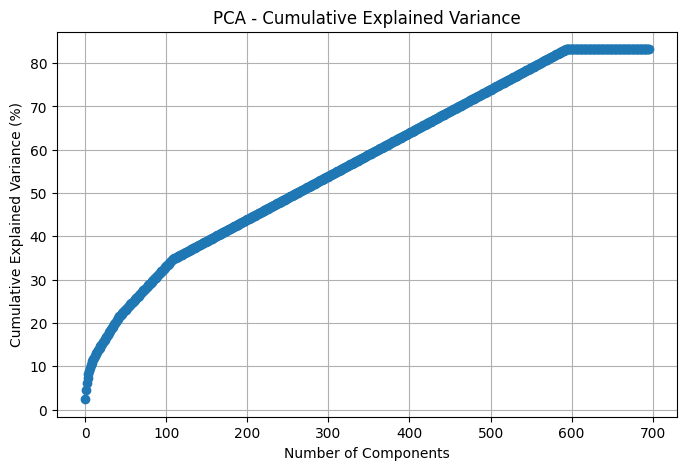

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=600, random_state=0)

x_pca_train = pca.fit_transform(x_train)
x_pca_test = pca.transform(x_test)

# Printing shape of X_train and X_test
print('Shape of X_train: ', x_pca_train.shape)
print('Shape of X_test: ', x_pca_test.shape)

Shape of X_train:  (3567, 600)
Shape of X_test:  (892, 600)


In [ ]:
clfs = [LinearRegression(), RandomForestRegressor(random_state=42)]

for clf in clfs:
  model_name = type(clf).__name__
  clf.fit(x_pca_train, y_train)
  predictions = clf.predict(x_pca_test)
  RMSE = np.sqrt(root_mean_squared_error(y_test, predictions))
  R_squared = r2_score(y_test, predictions)

In [ ]:
print(f"rmse :: {RMSE}")
print(f"r-squared :: {R_squared}")

rmse :: 0.8907502834874459
r-squared :: 0.2474676439976642
